In [45]:
from pathlib import Path

import polars as pl
import seaborn as sns
from hydra import compose, initialize
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

pl.Config.set_fmt_str_lengths(100)


def draw_venn2(train, test, rows, columns, x_size, y_size):
    fig, axes = plt.subplots(rows, columns, figsize=(x_size, y_size))
    column_names = test.columns
    for col, ax in zip(column_names, axes.ravel()):
        venn2(
            subsets=(set(train[col].drop_nulls().unique().to_list()), set(test[col].drop_nulls().unique().to_list())),
            set_labels=("train", "test"),
            ax=ax,
        )
        ax.set_title(col)
    fig.tight_layout()


with initialize(config_path="config", version_base=None):
    cfg = compose(config_name="config")
    cfg.exp_number = Path().resolve().name


In [54]:
train_df = pl.read_csv(cfg.data.train_path, try_parse_dates=True)
cloth_df = pl.read_csv(cfg.data.cloth_path, try_parse_dates=True)
test_df = pl.read_csv(cfg.data.test_path, try_parse_dates=True)
sub_df = pl.read_csv(cfg.data.sample_submission_path)


In [55]:
print("■ train")
display(train_df.head())
print("■ test")
display(test_df.head())
print("■ cloth")
display(cloth_df.head())
print("■ submission")
display(sub_df.head())


■ train


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
i64,i64,str,str,i64,i64,i64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lined and very slimming. i had to size up b/c it runs a bit snug around t…",5,1,4
0,39,"""Very cute""","""Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipp…",5,1,0
0,42,"""Beautiful! fruns small for typical retailer sizing""","""I love this skirt! i wasn't sure about the mix of the back pattern with the front but it works! it i…",5,1,5
0,45,null,"""I was really pleased with this skirt. the lightness of the fabric is nice and the colors matched the…",5,1,9
0,57,"""Unique, pretty asymmetric skirt""","""I saw this skirt in retailer several months ago and while it caught my eye, it was pricey. so i wait…",5,1,1


■ test


Clothing ID,Age,Title,Review Text,Positive Feedback Count
i64,i64,str,str,i64
0,32,"""So happy i bought this skirt!""","""I love this skirt. it does run a little small, i ordered an extra small and it is tight at the waist…",0
0,34,"""Runs small""","""Beautiful patterns and colors, but it sits very high and runs small. i'm normally a size 4 and got t…",0
0,37,"""Love the comfort of thi skirt""","""It is easily paired with a nice tip for work and feels great to wear all day""",0
0,39,"""Way too small""","""This is a beautiful skirt, but runs very small. i usually wear a size 8 and could not get the side z…",10
0,39,null,"""I usually wear a size 8/10 and i needed a large in this skirt. it flows so beautifully!""",0


■ cloth


Clothing ID,Division Name,Department Name,Class Name
i64,str,str,str
0,"""General""","""Bottoms""","""Skirts"""
1,"""General""","""Bottoms""","""Pants"""
2,"""General""","""Tops""","""Sweaters"""
3,"""General""","""Dresses""","""Dresses"""
4,"""General""","""Dresses""","""Dresses"""


■ submission


target
f64
0.488567
0.315813
0.764448
0.980691
0.406762


In [56]:
print("■ train")
display(train_df.describe())
print(train_df.dtypes)
print(f"行数: {train_df.shape[0]}, 列数: {train_df.shape[1]}")

print("\n■ test")
display(test_df.describe())
print(test_df.dtypes)
print(f"行数: {test_df.shape[0]}, 列数: {test_df.shape[1]}")

print("\n■ cloth")
display(cloth_df.describe())
print(cloth_df.dtypes)
print(f"行数: {cloth_df.shape[0]}, 列数: {cloth_df.shape[1]}")


■ train


statistic,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
str,f64,f64,str,str,f64,f64,f64
"""count""",10000.0,10000.0,"""8425""","""8720""",10000.0,10000.0,10000.0
"""null_count""",0.0,0.0,"""1575""","""1280""",0.0,0.0,0.0
"""mean""",123.6563,43.3936,null,null,4.1884,0.8202,2.6293
"""std""",65.693931,12.319564,null,null,1.112668,0.38404,5.820728
"""min""",0.0,18.0,"""""go to"" tee for sz 10+ women""","""#childsize. not sure where this went wrong but it's going back immediately. always wear a 0-2 in ret…",1.0,0.0,0.0
"""25%""",65.0,34.0,null,null,4.0,1.0,0.0
"""50%""",129.0,41.0,null,null,5.0,1.0,1.0
"""75%""",170.0,52.0,null,null,5.0,1.0,3.0
"""max""",232.0,99.0,"""~~so very retailer~~""","""You would expect anything woolen to be slightly scratchy. this is incredibly soft. i couldn't belive…",5.0,1.0,99.0


[Int64, Int64, String, String, Int64, Int64, Int64]
行数: 10000, 列数: 7

■ test


statistic,Clothing ID,Age,Title,Review Text,Positive Feedback Count
str,f64,f64,str,str,f64
"""count""",11155.0,11155.0,"""9335""","""9749""",11155.0
"""null_count""",0.0,0.0,"""1820""","""1406""",0.0
"""mean""",123.940027,43.290184,null,null,2.592201
"""std""",65.418225,12.222174,null,null,5.945481
"""min""",0.0,18.0,"""""beach business""""","""""does this sweater make my hips look big?"" my wife asked. this sweater was one of my christmas gifts…",0.0
"""25%""",70.0,34.0,null,null,0.0
"""50%""",129.0,41.0,null,null,1.0
"""75%""",170.0,52.0,null,null,3.0
"""max""",232.0,99.0,"""Zowie!""","""Yummy, soft material, but very faded looking. so much so that i am sending it back. if a faded look …",122.0


[Int64, Int64, String, String, Int64]
行数: 11155, 列数: 5

■ cloth


statistic,Clothing ID,Division Name,Department Name,Class Name
str,f64,str,str,str
"""count""",233.0,"""233""","""233""","""233"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",116.0,null,null,null
"""std""",67.405489,null,null,null
"""min""",0.0,"""General""","""Bottoms""","""Blouses"""
"""25%""",58.0,null,null,null
"""50%""",116.0,null,null,null
"""75%""",174.0,null,null,null
"""max""",232.0,"""Initmates""","""Trend""","""Trend"""


[Int64, String, String, String]
行数: 233, 列数: 4


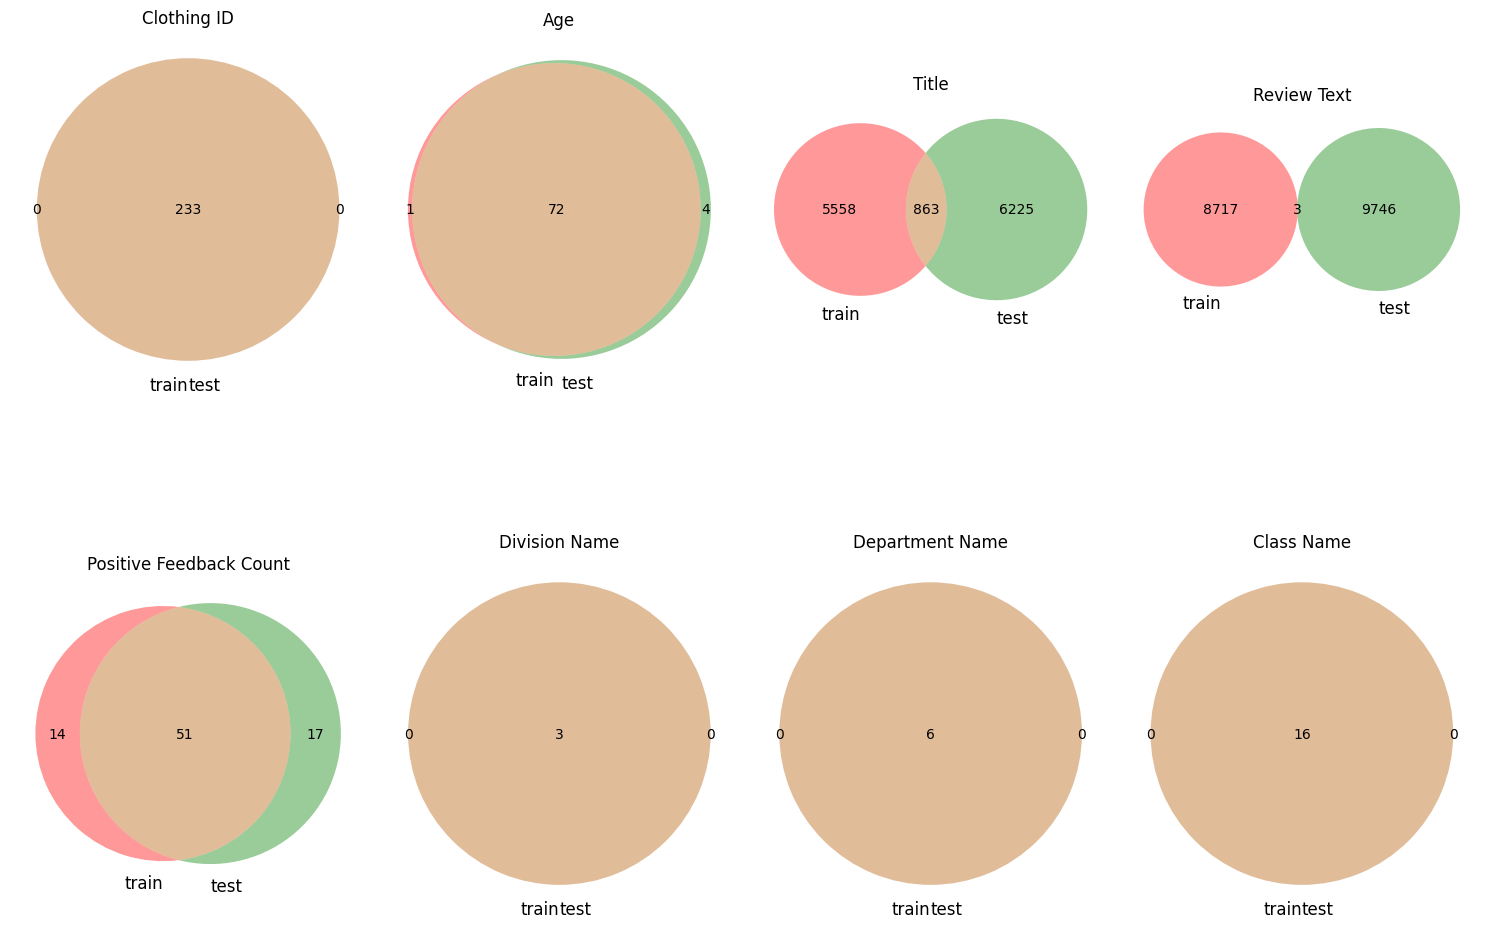

In [59]:
train_df = train_df.join(cloth_df, on="Clothing ID", how="left")
test_df = test_df.join(cloth_df, on="Clothing ID", how="left")

draw_venn2(train_df, test_df, rows=2, columns=4, x_size=15, y_size=12)


### train

In [11]:
train_df.head()


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
i64,i64,str,str,i64,i64,i64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lined and very slimming. i had to size up b/c it runs a bit snug around t…",5,1,4
0,39,"""Very cute""","""Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipp…",5,1,0
0,42,"""Beautiful! fruns small for typical retailer sizing""","""I love this skirt! i wasn't sure about the mix of the back pattern with the front but it works! it i…",5,1,5
0,45,null,"""I was really pleased with this skirt. the lightness of the fabric is nice and the colors matched the…",5,1,9
0,57,"""Unique, pretty asymmetric skirt""","""I saw this skirt in retailer several months ago and while it caught my eye, it was pricey. so i wait…",5,1,1


In [12]:
# title, review textに欠損あり
train_df.null_count()


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
u32,u32,u32,u32,u32,u32,u32
0,0,1575,1280,0,0,0


In [14]:
# 各列のユニーク数
display(train_df.select(pl.all().n_unique()))


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
u32,u32,u32,u32,u32,u32,u32
233,73,6422,8721,5,2,65


Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
f64,f64,f64,f64,f64
1.0,-0.022604,0.013598,0.004254,-0.006449
-0.022604,1.0,0.021359,0.023563,0.035068
0.013598,0.021359,1.0,0.791016,-0.057499
0.004254,0.023563,0.791016,1.0,-0.075364
-0.006449,0.035068,-0.057499,-0.075364,1.0


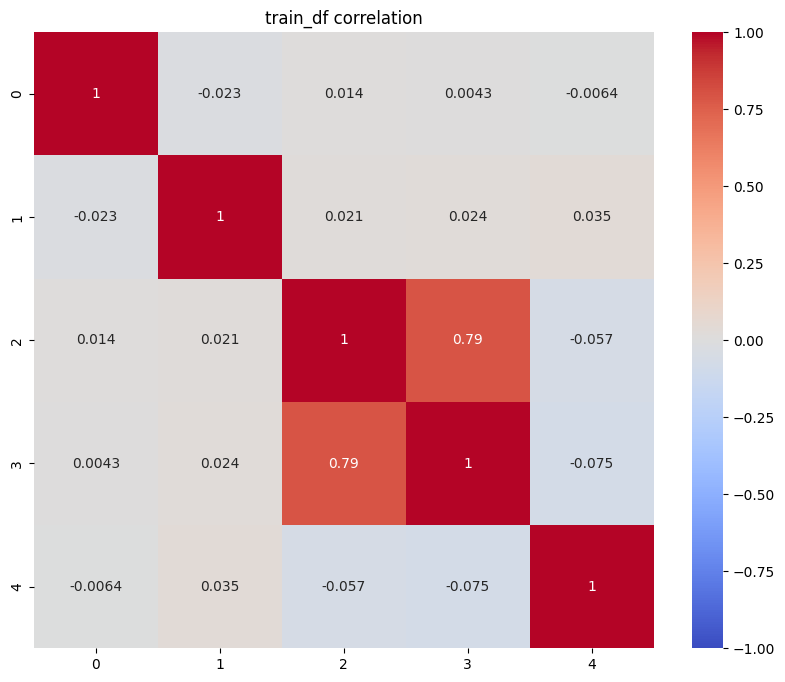

In [64]:
# train_dfの相関係数
train_corr = train_df.select(["Clothing ID", "Age","Rating", "Recommended IND", "Positive Feedback Count"]).corr()

display(train_corr)

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(train_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("train_df correlation")
plt.show()


### Clothes

In [65]:
cloth_df.head()


Clothing ID,Division Name,Department Name,Class Name
i64,str,str,str
0,"""General""","""Bottoms""","""Skirts"""
1,"""General""","""Bottoms""","""Pants"""
2,"""General""","""Tops""","""Sweaters"""
3,"""General""","""Dresses""","""Dresses"""
4,"""General""","""Dresses""","""Dresses"""


In [66]:
# 欠損値はなし
cloth_df.null_count()


Clothing ID,Division Name,Department Name,Class Name
u32,u32,u32,u32
0,0,0,0


In [67]:
display(cloth_df.select(pl.all().n_unique()))


Clothing ID,Division Name,Department Name,Class Name
u32,u32,u32,u32
233,3,6,16


### target

<Axes: >

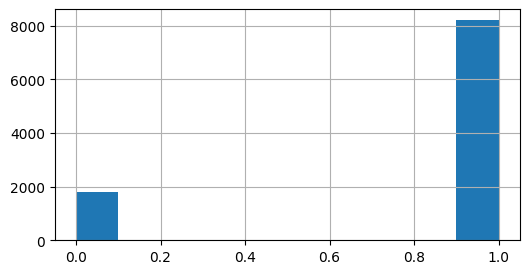

In [69]:
train_df.to_pandas()[cfg.target].hist(bins=10, figsize=(6, 3))


In [72]:
for c in train_df.columns:
    display(train_df[c].value_counts(sort=True))


Clothing ID,count
i64,u32
226,480
83,391
148,360
164,268
65,264
…,…
145,4
15,2
41,2


Age,count
i64,u32
39,525
36,372
35,365
41,343
34,343
…,…
91,1
87,1
99,1


Title,count
str,u32
null,1575
"""Love it!""",72
"""Beautiful""",55
"""Love!""",43
"""Love""",43
…,…
"""Nicely fitted, lined dress but very warm""",1
"""Pretty, femine""",1
"""Runs big on top""",1


Review Text,count
str,u32
null,1280
"""Adorable, well-made skirt! lined and very slimming. i had to size up b/c it runs a bit snug around t…",1
"""Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipp…",1
"""I love this skirt! i wasn't sure about the mix of the back pattern with the front but it works! it i…",1
"""I was really pleased with this skirt. the lightness of the fabric is nice and the colors matched the…",1
…,…
"""I really like the dress, the material, the print and the pleated skirt are totally fun. however, the…",1
"""I loved the dress, but just not dressy enough after rethinking what i needed. very easy order and re…",1
"""I was really hoping this dress would work because it looks adorable on the model. i ordered my usual…",1


Rating,count
i64,u32
5,5552
4,2175
3,1240
2,671
1,362


Recommended IND,count
i64,u32
1,8202
0,1798


Positive Feedback Count,count
i64,u32
0,4743
1,1712
2,912
3,593
4,397
…,…
99,1
68,1
98,1


Division Name,count
str,u32
"""General""",9789
"""Initmates""",151
"""General Petite""",60


Department Name,count
str,u32
"""Tops""",4841
"""Dresses""",2980
"""Bottoms""",1560
"""Jackets""",411
"""Intimate""",190
"""Trend""",18


Class Name,count
str,u32
"""Dresses""",2980
"""Knits""",2246
"""Blouses""",1477
"""Sweaters""",615
"""Pants""",587
…,…
"""Shorts""",45
"""Legwear""",43
"""Swim""",20
